# Plot glacier terminus positions at different dates

    -read in terminuspickout.csv and create a new column called xdist_boxtopleft in which it calculates the centroidx-lowest_x
    -create date-time object for date
    -plot x_dist vs. date!

### Import packages and read in csv files

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime

basepath = '/Users/julialiu/Documents/M_Thesis/Data/'

In [64]:
#Read in file with box coordinates
box_df = pd.read_csv(basepath+'Boxes_coords_pathrows.csv', sep=',', dtype=str)
box_df = box_df.set_index('BoxID')

#Read in file with terminus picks
termini_df = pd.read_csv(basepath+'terminuspickout_2019_07_16.csv', sep=',', dtype=str, header=1)
termini_df.replace(to_replace ="NaN", value = np.nan)

#look at the DataFrames
#termini_df.head()
#box_df

#Check column names for termini_df:
print(termini_df.columns.values)
termini_df_rownum = termini_df.shape[0]
print(termini_df_rownum)

['BoxID' ' Img_Date' ' Scale' ' Posfirst' ' Size' ' Centroid_X'
 ' Centroid_Y']
53


### Calculate distances from centroids the box coordinates and add to updated DataFrame

In [143]:
#create a list of the subset dataframes (by BoxID) to be concatenated back together at the end
subset_dfs = []

for BoxID in box_df.index:
    box_leftmost_x = np.float(box_df.loc[BoxID, 'leftmost_x'])
    box_midpoint_x = np.float(box_df.loc[BoxID, 'midpoint_x'])
    #print("Box"+BoxID, box_leftmost_x, box_midpoint_x)
    
    #grab termini pick info for that BoxID
    subset_df = termini_df[termini_df['BoxID'] == BoxID].copy()
    
    #grab the centroids as an array
    centroids_x = np.array(subset_df.loc[:, ' Centroid_X'])
    #convert to float
    centroids_x = centroids_x.astype(float)

    #Calculate the x distance between each centroid and the leftmost point/midpoint of box
    xdist_leftmost = centroids_x - box_leftmost_x
    xdist_midpoint = centroids_x - box_midpoint_x

    #add these xdistances to the subset array
    subset_df['xdist_leftmost'] = xdist_leftmost
    subset_df['xdist_midpoint'] = xdist_midpoint
    
    #append the subset df to the subset dfs list
    subset_dfs.append(subset_df)

xdist_df = pd.concat(subset_dfs)
xdist_df.head()

,BoxID,Img_Date,Scale,Posfirst,Size,Centroid_X,Centroid_Y,xdist_leftmost,xdist_midpoint
0,001,20181001,018,55686,63,127.9365234375,166.61903381347656,13.936523,10.936523
1,001,20180825,003,55993,74,130.47291564941406,164.90545654296875,16.472916,13.472916
2,001,20180924,007,55686,76,128.74996948242188,163.53950500488281,14.749969,11.749969
3,001,20180830,004,55993,76,129.74998474121094,163.23684692382812,15.749985,12.749985
4,001,20180613,004,56300,75,130.413330078125,164.7066650390625,16.413330,13.413330


### Convert dates into DateTime objects for plotting timeseries

In [159]:
#grab dates from DataFrame:
dates = xdist_df.loc[:, ' Img_Date']

#create list to hold new datetime objects
datetime_objs = []

for date in dates:
    datetime_obj = datetime.strptime(date, '%Y%m%d')
    datetime_objs.append(datetime_obj)
    
xdist_df['datetimes'] = datetime_objs
xdist_df.head()

,BoxID,Img_Date,Scale,Posfirst,Size,Centroid_X,Centroid_Y,xdist_leftmost,xdist_midpoint,datetimes
0,001,20181001,018,55686,63,127.9365234375,166.61903381347656,13.936523,10.936523,2018-10-01
1,001,20180825,003,55993,74,130.47291564941406,164.90545654296875,16.472916,13.472916,2018-08-25
2,001,20180924,007,55686,76,128.74996948242188,163.53950500488281,14.749969,11.749969,2018-09-24
3,001,20180830,004,55993,76,129.74998474121094,163.23684692382812,15.749985,12.749985,2018-08-30
4,001,20180613,004,56300,75,130.413330078125,164.7066650390625,16.413330,13.413330,2018-06-13


### Plot terminus position vs. datetime for each BoxID

Convert dates to datetime objects

In [167]:
#set dictionary to call info in DataFrame for each individual BoxID
termini_bybox = {}

#grab dataframe for each individual BoxID
for BoxID in box_df.index:
    #grab termini pick info for that BoxID
    termini_bybox_df = xdist_df[xdist_df['BoxID'] == BoxID].copy()
    #update to dictionary
    termini_bybox.update( {BoxID: termini_bybox_df} )

Plot for each BoxId

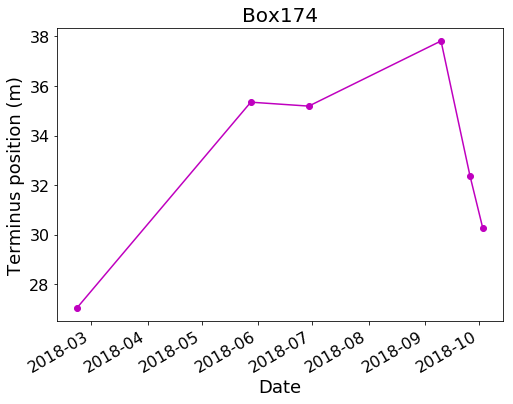

In [220]:
#set box of interest (BOI)
BOI = '174'
df_BOI = termini_bybox[BOI]
#print(df_BOI)

#Plot!
plotted = df_BOI.plot(x='datetimes', y='xdist_midpoint', legend=False, figsize=(8,6), style='mo-')
plt.title("Box"+BOI, fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Terminus position (m)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()